<a href="https://colab.research.google.com/github/pbitalo/titanic-kaggle/blob/master/Projeto_Final_Machine_learning_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TRABALHO FINAL DA DISCIPLINA DE MACHINE LEARNING II.
### CURSO DE PÓS GRADUAÇÃO EM CIÊNCIA DE DADOS.
### INSTITUIÇÃO: UNIFACISA. Campina Grande / PB.
### ALUNO: ÍTALO PEREIRA DE BRITO.
### MATRÍCULA: POS1690027.

### Objetivo 

Realizar análise na base do Titanic e submeter os resultados a competição da plataforma Kaggle, objetivando obter pontuação igual ou superior a 80%.

### Importando Bibliotecas

In [0]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import statistics
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, FeatureUnion
import datetime
import time

### Importando as bases de treino e teste

In [0]:
base_treino = pd.read_csv("https://raw.githubusercontent.com/pbitalo/titanic-kaggle/master/train.csv")
base_teste = pd.read_csv("https://raw.githubusercontent.com/pbitalo/titanic-kaggle/master/test.csv")

### Análise Exploratória dos Dados (Exploratory Data Analysis / EDA)

print("Tamanho base de treino: {0}\nTamanho bate de teste size: {1}".format(base_treino.shape,base_teste.shape))

In [48]:
base_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
base_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Inicialmente temos 5 variaáveis categóricas (Name, Sex, Ticket, Cabin e Embarked) e as demais são numéricas.

A seguir, veremos a descrição das colunas. (acesso a descrição no site do [Kaggle](https://www.kaggle.com/c/titanic/data))

- **PassengerID** - Uma coluna adicionada pelo Kaggle para identificar cada linha e facilitar os envios
- **Survived** - - se o passageiro sobreviveu ou não e o valor que estamos prevendo (0 = Não, 1 = Sim)
- **Pclass** - A classe do bilhete que o passageiro comprou (1 = 1º, 2 = 2º, 3 = 3º)
- **Sex** - O sexo do passageiro
- **Age** - A idade do passageiro em anos
- **SibSp** - O número de irmãos ou cônjuges que o passageiro tinha a bordo do Titanic
- **Parch** - O número de pais ou filhos que o passageiro tinha a bordo do Titanic
- **Ticket** - O número do bilhete do passageiro
- **Fare** - A tarifa paga pelo passageiro
- **Cabin** - O número da cabine do passageiro
- **Embarked** - O porto em que o passageiro embarcou (C = Cherbourg, Q = Queenstown, S = Southampton)

#### Dados faltantes

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

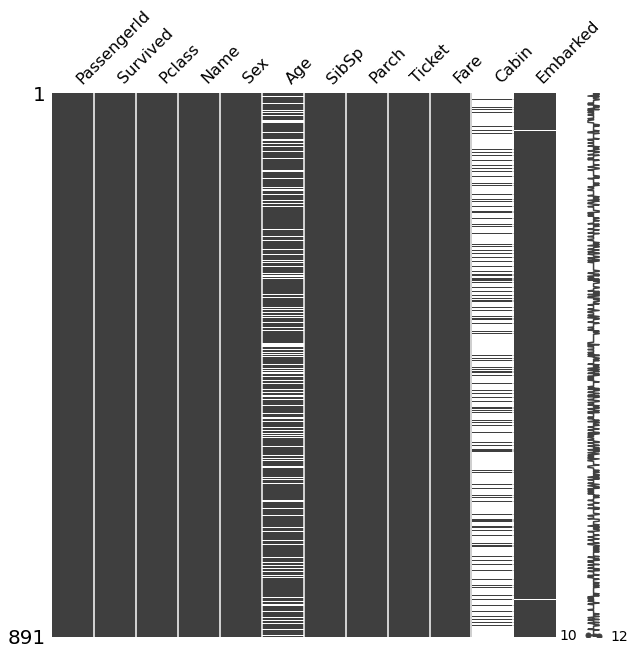

In [50]:
msno.matrix(base_treino,figsize=(10,10))
base_treino.isnull().sum()/base_treino.shape[0]

Verificando quantos registros temos de pessoas que morreram e que sobreviveram na base de treino

In [51]:
print('Legenda')
print('0 = Morreu')
print('1 = Sobreviveu')
print('------------------------')
print('------------------------')

print('Número de sobreviventes')
print(base_treino.Survived.value_counts())

print('------------------------')

print('Porcentagem de mortos')
print(base_treino['Survived'].value_counts(normalize=True))

print('------------------------')

Legenda
0 = Morreu
1 = Sobreviveu
------------------------
------------------------
Número de sobreviventes
0    549
1    342
Name: Survived, dtype: int64
------------------------
Porcentagem de mortos
0    0.616162
1    0.383838
Name: Survived, dtype: float64
------------------------


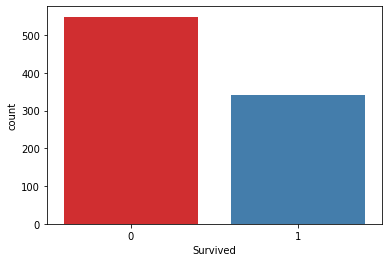

In [52]:
sns.countplot(base_treino['Survived'], palette="Set1", saturation=0.8)

A seguir, vamos observar um gráfico que irá relacionar as variáveis Survived e Pclass

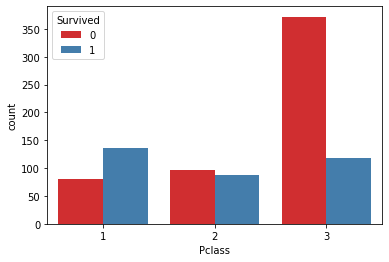

In [53]:
sns.countplot(base_treino['Pclass'], hue=base_treino['Survived'], palette="Set1", saturation=0.8)

Olhando o gráfico, fica perceptível notar que houve mais mortes de integrantes que ocupavam a terceira classe, isso será importe mais a frente para conseguirmos um norte que nos conduzirá a tratarmos os dados a fim de obter novas correlações.

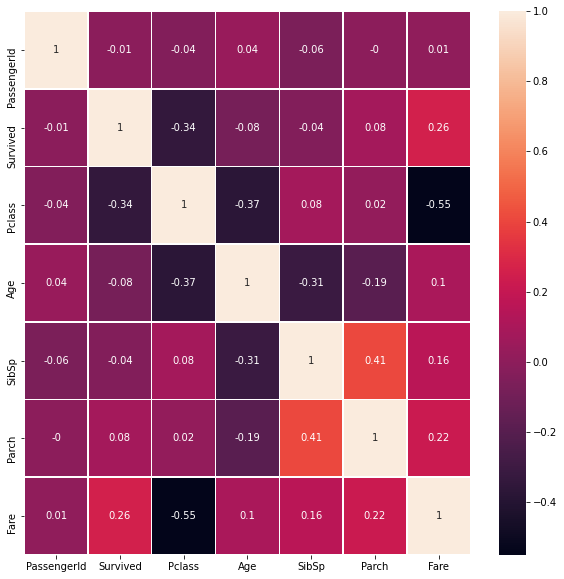

In [54]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(base_treino.corr().round(2),  linewidths=.5, annot = True)

As correlações mais fortes que temos nesse momento em relação a variável pretidora são:  Pclass e Fare. Vale comentar que essas correlações de -0.34 e 0.26 são consideradas fracas.

A seguir, vamos por em prática a fase de pré-processamento dos dados/engenharia de recursos (feature engineering), onde nelas, iremos manipular os dados a fim de obter novas correlações e correlações mais fortes que iram nos fornecer um modelo mais robusto e consequentemente mais eficaz no processo de previsão.

A seguir, vamos observar qual a proporção de sobreviventes entre os sexos.

Mulheres Sobreviventes: 0.7420382165605095 %
Homens sobreviventes: 0.18890814558058924 %


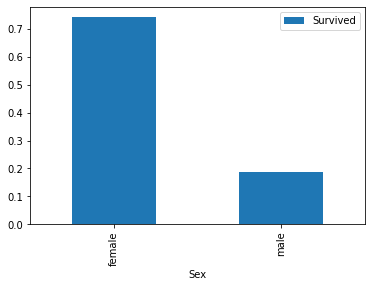

In [55]:
print("Mulheres Sobreviventes: {0} %\nHomens sobreviventes: {1} %".format(base_treino.pivot_table(index="Sex",values="Survived").iloc[0,0],base_treino.pivot_table(index="Sex",values="Survived").iloc[1,0]))

base_treino.pivot_table(index="Sex",values="Survived",).plot.bar()
plt.show()

### Engenharia de Recursos (feature engineering)

A variável <strong>"Name"</strong>, possuí uma informação relavante que pode ser extraído, que é o título.

In [56]:
base_treino['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

O título pode estar relacionado a taxa de sobrevivência, pois uma vez que o mesmo defina o grau de "importância" do indivíduo na catastrofé, podemos imaginar que quanto maior a titulariadade maior o grau de sobrevivência.

In [0]:
base_treino['Title'] = base_treino['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

base_teste['Title'] = base_teste['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

- **Número de pessoas a bordo agrupadas por título**

In [58]:
base_treino['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Mme.           1
Lady.          1
Jonkheer.      1
Don.           1
the            1
Sir.           1
Ms.            1
Capt.          1
Name: Title, dtype: int64

- **Sobrevivência entre titularidade**

In [59]:
base_treino['Survived'].groupby(base_treino['Title']).mean().sort_values()

Title
Capt.        0.000000
Don.         0.000000
Jonkheer.    0.000000
Rev.         0.000000
Mr.          0.156673
Dr.          0.428571
Col.         0.500000
Major.       0.500000
Master.      0.575000
Miss.        0.697802
Mrs.         0.792000
Mme.         1.000000
Sir.         1.000000
Ms.          1.000000
Lady.        1.000000
Mlle.        1.000000
the          1.000000
Name: Survived, dtype: float64

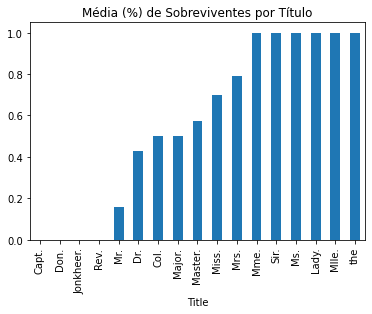

In [60]:
base_treino['Survived'].groupby(base_treino['Title']).mean().sort_values().plot.bar(title="Média (%) de Sobreviventes por Título")
plt.show()

Outra relação importante que parece fazer sentido é o tamanho do nome passageiro, pois quanto maior o nome maior o indice de sobrevivência do mesmo, isso pode indicar que o nome tamanho do nome tem relação com o grau de importância desse indivíduo.

In [61]:
base_treino['Name_Len'] = base_treino['Name'].apply(lambda x: len(x))
base_teste['Name_Len'] = base_teste['Name'].apply(lambda x: len(x))
base_treino['Survived'].groupby(pd.qcut(base_treino['Name_Len'],5)).mean()

Name_Len
(11.999, 19.0]    0.220588
(19.0, 23.0]      0.301282
(23.0, 27.0]      0.319797
(27.0, 32.0]      0.442424
(32.0, 82.0]      0.674556
Name: Survived, dtype: float64

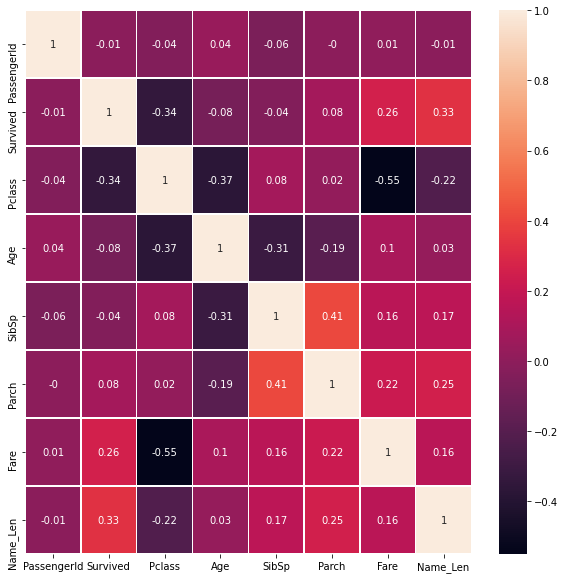

In [62]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(base_treino.corr().round(2),  linewidths=.5, annot = True)

Conseguimos obter uma nova variável com uma boa correlação em relação ao que tínhamos até o momento, sem dúvidas isso irá ajudar os algoritmos a gerar um modelo mais robusto.

A seguir, vamos classificar intervalor categóricos para o campo "Age".

  - **Missing**, para -1 a 0
  - **Infant**, para 0 a 5
  - **Child**, para 5 a 12
  - **Teenager**, para 12 a 18
  - **Young Adult**, para 18 a 35
  - **Adult**, para 35 a 60
  - **Senior**, para 60 a 100

In [0]:
base_treino["Age"] = base_treino["Age"].fillna(-0.5)

cut_points = [-1,0,5,12,18,35,60,100]

label_names = ["Missing","Infant","Child",
               "Teenager","Young Adult","Adult","Senior"]

base_treino["Age_categories"] = pd.cut(base_treino["Age"],
                                      cut_points,
                                      labels=label_names)

Veremos no próximo gráfico de coordenadas paralelas a ligação entre Sexo, Classe, Age_categories e Survived.

In [64]:
fig = px.parallel_categories(base_treino[["Sex","Age_categories","Pclass","Survived"]],
                              color="Survived", 
                              color_continuous_scale=px.colors.sequential.Sunsetdark)
fig.show()

O gráfico anterior ajuda na visualização de dados categóricos, através do fluxo que existe entre eles, paralelizando as suas relações.

No próximo gráfico, vamos analisar quais as categorias mais sobreviveram ao naufrágio.

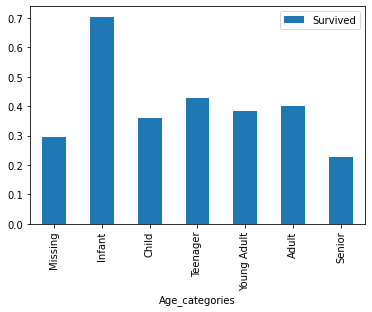

In [65]:
base_treino.pivot_table(index="Age_categories",values='Survived').plot.bar()
plt.show()

A narrativa que sabemos existir: "Mulheres e crianças primeiro", passa a fazer algum sentido quando verificamos que a maior proporção que veio a sobreviver esta sendo categorizado como "Infant" que compreende o intervalo entre 0 a 5 anos.

Vale a pena verificarmos se existe alguma relação entre sobreviventes e outras variáveis.

Vamos explorar a variável <strong>Ticket</strong>.

In [66]:
base_treino['Ticket_'] = base_treino['Ticket'].apply(lambda x: str(x)[0])
base_treino['Ticket_'].unique()

array(['A', 'P', 'S', '1', '3', '2', 'C', '7', 'W', '4', 'F', 'L', '9',
       '6', '5', '8'], dtype=object)

In [67]:
base_treino['Ticket_'] = np.where((base_treino['Ticket_']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), base_treino['Ticket_'],
                          np.where((base_treino['Ticket_']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                   'Tickets_baratos', 'Outros_tickets'))

base_treino.groupby(['Ticket_'])['Survived'].mean().sort_values()

Ticket_
A                  0.068966
Tickets_baratos    0.148936
3                  0.239203
S                  0.323077
C                  0.340426
2                  0.464481
Outros_tickets     0.625000
1                  0.630137
P                  0.646154
Name: Survived, dtype: float64

Existe uma alta porcentagem de sobreviventes quando criamos esse meio de classificação através do ticket.

Faremos a mesma coisa com a variável "Name" e vamos observar se conseguimos extrair algo.

In [68]:
base_treino['Name_Len'] = base_treino['Name'].apply(lambda x: len(x))
print('-----------------------------')
print('-----------------------------')
print('Quantidade de pessoas por intervalos')
print('-----------------------------')
print(pd.qcut(base_treino['Name_Len'],5).value_counts())
print('-----------------------------')
print('-----------------------------')
print('Porcentagem de sobreviventes em relação ao tamanho do nome')
print('-----------------------------')
print(base_treino['Survived'].groupby(pd.qcut(base_treino['Name_Len'],5)).mean())
print('-----------------------------')
print('-----------------------------')

-----------------------------
-----------------------------
Quantidade de pessoas por intervalos
-----------------------------
(11.999, 19.0]    204
(23.0, 27.0]      197
(32.0, 82.0]      169
(27.0, 32.0]      165
(19.0, 23.0]      156
Name: Name_Len, dtype: int64
-----------------------------
-----------------------------
Porcentagem de sobreviventes em relação ao tamanho do nome
-----------------------------
Name_Len
(11.999, 19.0]    0.220588
(19.0, 23.0]      0.301282
(23.0, 27.0]      0.319797
(27.0, 32.0]      0.442424
(32.0, 82.0]      0.674556
Name: Survived, dtype: float64
-----------------------------
-----------------------------


Mais um passo alcançado, vamos explorar novas variáveis.

Vamos explorar um pouco mais a variável <strong>Name</strong>, pois ela possui dados relevantes, como a titularidade e nome da família do passageiro.

In [69]:
base_treino["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

- **Extraindo Titularidade**

In [70]:
base_treino["Name"].str.extract(' ([A-Za-z]+)\.',expand=False).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

Podemos então fazer uma nova classificação através da titularidade. Vamos armazenar o resultado em um objeto que será utilizado mais adianta para fazer uma nova classificação de gênero.

In [0]:
titulos = {
    "Mr" :         "man",
    "Mme":         "woman",
    "Ms":          "woman",
    "Mrs" :        "woman",
    "Master" :     "aged",
    "Mlle":        "woman",
    "Miss" :       "woman",
    "Capt":        "man",
    "Col":         "man",
    "Major":       "man",
    "Dr":          "man",
    "Rev":         "man",
    "Jonkheer":    "man",
    "Don":         "man",
    "Sir" :        "man",
    "Countess":    "woman",
    "Lady" :       "woman"
}

- **Extraindo Família**

In [72]:
base_treino["Name"].str.extract('([A-Za-z]+)\,',expand=False).unique()

array(['Braund', 'Cumings', 'Heikkinen', 'Futrelle', 'Allen', 'Moran',
       'McCarthy', 'Palsson', 'Johnson', 'Nasser', 'Sandstrom', 'Bonnell',
       'Saundercock', 'Andersson', 'Vestrom', 'Hewlett', 'Rice',
       'Williams', 'Planke', 'Masselmani', 'Fynney', 'Beesley', 'McGowan',
       'Sloper', 'Asplund', 'Emir', 'Fortune', 'Dwyer', 'Todoroff',
       'Uruchurtu', 'Spencer', 'Glynn', 'Wheadon', 'Meyer', 'Holverson',
       'Mamee', 'Cann', 'Yarred', 'Ahlin', 'Turpin', 'Kraeff', 'Laroche',
       'Devaney', 'Rogers', 'Lennon', 'Driscoll', 'Samaan', 'Franchi',
       'Panula', 'Nosworthy', 'Harper', 'Faunthorpe', 'Ostby', 'Woolner',
       'Rugg', 'Novel', 'West', 'Goodwin', 'Sirayanian', 'Icard',
       'Harris', 'Skoog', 'Stewart', 'Moubarek', 'Nye', 'Crease', 'Kink',
       'Jenkin', 'Hood', 'Chronopoulos', 'Bing', 'Moen', 'Staneff',
       'Moutal', 'Caldwell', 'Dowdell', 'Waelens', 'Sheerlinck',
       'McDermott', 'Carrau', 'Ilett', 'Backstrom', 'Ford', 'Slocovski',
       '

In [0]:
base_treino["Title"] = base_treino["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
base_treino["Gender"] = base_treino["Title"].map(titulos)
base_treino["family"] = base_treino["Name"].str.extract('([A-Za-z]+)\,',expand=False)
boy_women = base_treino[base_treino["Gender"] != "man"].groupby(by=["family"])["Name"].agg("count")
base_treino["family_size"] = base_treino["family"].map(boy_women).fillna(0.0)

Criamos mais algumas relações importantes, como títularidade do individuo, nome da família e tamanho da família, pois quando houve o desastre, a ordem era priorizar mulheres e crianças.

Vamos analisar a variável <strong>Fare</strong>, pois deve existir alguma relação entre a taxa de sobrevivência entre os passageiros que pagaram mais caro, a esperança é que exista algum tipo de benefício que fez com que a taxa de sobrevivência mais elevada esteja relacionada aos que pagaram um maior valor.

- **Qtde de passageiros por intervalor de Preço da passagem paga**

In [74]:
pd.qcut(base_treino['Fare'], 6).value_counts()

(-0.001, 7.775]      156
(7.775, 8.662]       152
(52.369, 512.329]    149
(14.454, 26.0]       149
(26.0, 52.369]       146
(8.662, 14.454]      139
Name: Fare, dtype: int64

- **Percentual de sobrevivência nos intervalos de preço pago**

In [75]:
base_treino['Survived'].groupby(pd.qcut(base_treino['Fare'], 6)).mean()

Fare
(-0.001, 7.775]      0.205128
(7.775, 8.662]       0.190789
(8.662, 14.454]      0.366906
(14.454, 26.0]       0.436242
(26.0, 52.369]       0.417808
(52.369, 512.329]    0.697987
Name: Survived, dtype: float64

A espectativa tinha fundamento, pois verificando o resultado anterior ficou claro que o grupo que pagou entre 52 a 512 obtiveram uma taxa de sobrevivência de 69,7% e isso é muito significante. 

Para finalizar a análise de Fare, vamos observar em qual classe os passageiros estavam ao pagar os intervalos de valores definidos anteriormente.

In [76]:
pd.crosstab(pd.qcut(base_treino['Fare'], 6), columns=base_treino['Pclass'])

Pclass,1,2,3
Fare,,,
"(-0.001, 7.775]",6,6,144
"(7.775, 8.662]",0,0,152
"(8.662, 14.454]",0,86,53
"(14.454, 26.0]",6,53,90
"(26.0, 52.369]",76,32,38
"(52.369, 512.329]",128,7,14


Vamos então analisar alguma relação entre a variável <strong>Cabin</strong>.

In [77]:
base_treino['Cabin_'] = base_treino['Cabin'].apply(lambda x: str(x)[0])
base_treino['Cabin_'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_, dtype: int64

In [78]:
base_treino.groupby(['Cabin_'])['Survived'].mean().sort_values()

Cabin_
T    0.000000
n    0.299854
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.744681
E    0.750000
D    0.757576
Name: Survived, dtype: float64

A taxa de sobrevivência encontrada ao grupo classificado como D foi de 75,75%, E 75%, isso é extramente relevante, conseguiremos extrair bons resultados desses dados.

In [79]:
base_treino['Cabin_num'] = base_treino['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
base_treino['Cabin_num'].replace('an', np.NaN, inplace = True)
base_treino['Cabin_num'] = base_treino['Cabin_num'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)

base_treino['Survived'].groupby(pd.qcut(base_treino['Cabin_num'], 3)).mean()

Cabin_num
(1.999, 28.667]     0.716418
(28.667, 65.667]    0.651515
(65.667, 148.0]     0.641791
Name: Survived, dtype: float64

Vale salientar que as outras duas variáveis não abordadas até então (SibSp e Parch), não são ao meu ver tão importantes nesse momento, pois suas relações são aos familiares e cônjuges dos passageiros, sendo assim, se fazem desnecessárias, pois já conseguimos formular dados que poderiam ser extraídos delas, que no caso foi <strong>family_size</strong>.

Estamos chegando ao fim...Vamos observar por ultimo a variável <strong>Embarked</strong>.
Inicialmente, vimos que essa coluna possuí valores faltantes, vamos substituí-los pelo valor mais comum e ver o agrupamento dos dados em relação aos sobreviventes.

In [80]:
base_treino["Embarked"].fillna(statistics.mode(base_treino['Embarked']),inplace=True)
base_treino['Survived'].groupby(base_treino['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

#### Utils

In [0]:
def tratar_nomes(base_treino, base_teste):
    for i in [base_treino, base_teste]:
        i['Name_Tam'] = i['Name'].apply(lambda x: len(x))
        i['Nome_Titulo'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
    return base_treino, base_teste

def tratar_idade(base_treino, base_teste):
    for i in [base_treino, base_teste]:
        i['Age_Nulo'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = base_treino.groupby(['Nome_Titulo', 'Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return base_treino, base_teste

def tratar_familia(base_treino, base_teste):
    for i in [base_treino, base_teste]:
        i['Fam_Tam'] = np.where((i['SibSp']+i['Parch']) == 0 , 'Sozinho',
                           np.where((i['SibSp']+i['Parch']) <= 3,'Pequena', 'Grande'))
        del i['SibSp']
        del i['Parch']
    return base_treino, base_teste

def tratar_ticket(base_treino, base_teste):
    for i in [base_treino, base_teste]:
        i['Ticket_'] = i['Ticket'].apply(lambda x: str(x)[0])
        i['Ticket_'] = i['Ticket_'].apply(lambda x: str(x))
        i['Ticket_'] = np.where((i['Ticket_']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), i['Ticket_'],
                                   np.where((i['Ticket_']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            'Ticket_barato', 'Ticket_outros'))
        i['Ticket_'] = i['Ticket_'].apply(lambda x: len(x))
    return base_treino, base_teste

def tratar_cabin(base_treino, base_teste):
    for i in [base_treino, base_teste]:
        i['Cabin_'] = i['Cabin'].apply(lambda x: str(x)[0])
    return base_treino, base_teste

def tratar_num_cabine(base_treino, base_teste):
    for i in [base_treino, base_teste]:
        i['Cabin_temp'] = i['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
        i['Cabin_temp'].replace('an', np.NaN, inplace = True)
        i['Cabin_temp'] = i['Cabin_temp'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
        i['Cabin_num'] = pd.qcut(base_treino['Cabin_temp'],3)
    base_treino = pd.concat((base_treino, pd.get_dummies(base_treino['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    base_teste = pd.concat((base_teste, pd.get_dummies(base_teste['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    del base_treino['Cabin_num']
    del base_teste['Cabin_num']
    del base_treino['Cabin_temp']
    del base_teste['Cabin_temp']
    return base_treino, base_teste

def tratar_local_embarque(base_treino, base_teste):
    for i in [base_treino, base_teste]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return base_treino, base_teste

def gerar_dummies(base_treino, base_teste, columns):
    for col in columns:
        base_treino[col] = base_treino[col].apply(lambda x: str(x))
        base_teste[col] = base_teste[col].apply(lambda x: str(x))
        coluna = [col+'_'+i for i in base_treino[col].unique() if i in base_teste[col].unique()]
        base_treino = pd.concat((base_treino, pd.get_dummies(base_treino[col], prefix = col)[coluna]), axis = 1)
        base_teste = pd.concat((base_teste, pd.get_dummies(base_teste[col], prefix = col)[coluna]), axis = 1)
        del base_treino[col]
        del base_teste[col]
    return base_treino, base_teste

### Tratando os dados p gerar o modelo e previsões


In [0]:
base_treino = pd.read_csv("https://raw.githubusercontent.com/pbitalo/titanic-kaggle/master/train.csv")
base_teste = pd.read_csv("https://raw.githubusercontent.com/pbitalo/titanic-kaggle/master/test.csv")

base_treino, base_teste = tratar_nomes(base_treino, base_teste)

del base_treino['Name']
del base_teste['Name']

base_treino, base_teste = tratar_idade(base_treino, base_teste)
base_treino, base_teste = tratar_num_cabine(base_treino, base_teste)
base_treino, base_teste = tratar_cabin(base_treino, base_teste)

del base_treino['Cabin']
del base_teste['Cabin']

base_treino, base_teste = tratar_local_embarque(base_treino, base_teste)
base_treino, base_teste = tratar_familia(base_treino, base_teste)

base_teste['Fare'].fillna(base_treino['Fare'].mean(), inplace = True)
base_treino['Fare'].fillna(base_treino['Fare'].mean(), inplace = True)

base_treino, base_teste = tratar_ticket(base_treino, base_teste)

del base_treino['Ticket']
del base_teste['Ticket']

base_treino, base_teste = gerar_dummies(base_treino, base_teste, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_','Cabin_', 'Nome_Titulo', 'Fam_Tam'])
                                                                     
del base_treino['PassengerId']
del base_teste['PassengerId']

#### Realizando Previsão com algoritmo RandomForestClassifier

In [83]:
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(base_treino.iloc[:, 1:], base_treino.iloc[:, 0])

print("Score = ", rf.oob_score_*100, '%')

Score =  83.05274971941638 %


In [0]:
predictions = rf.predict(base_teste)
predictions = pd.DataFrame(predictions, columns=['Survived'])
teste = pd.read_csv("https://raw.githubusercontent.com/pbitalo/titanic-kaggle/master/test.csv")
predictions = pd.concat((teste.iloc[:, 0], predictions), axis = 1)
predictions.to_csv('randomForestPredict.csv',index = False)

<h6 class="text-center">Submit ao site do Kaggle</h6>
<img src="https://raw.githubusercontent.com/pbitalo/titanic-kaggle/master/randomForestPredict.jpg">

#### Ajustando Hyperparameteros e gerando um pipeline simples afim de testar algoritmos e melhorar a previsão

In [85]:
seed = 42
scoring = {'Accuracy': make_scorer(accuracy_score)}

pipe = Pipeline(steps = [("clf",XGBClassifier())])

search_space = [
                {"clf":[RandomForestClassifier()],
                 "clf__n_estimators": [100],
                 "clf__criterion": ["gini","entropy"],
                 "clf__max_leaf_nodes": [64],
                 "clf__random_state": [seed]
                 },
                {"clf":[LogisticRegression()],
                 "clf__solver": ["liblinear"]
                 },
                {"clf":[XGBClassifier()],
                 "clf__n_estimators": [50,100],
                 "clf__max_depth": [4],
                 "clf__learning_rate": [0.001, 0.01,0.1],
                 "clf__random_state": [seed],
                 "clf__subsample": [1.0],
                 "clf__colsample_bytree": [1.0],
                 }
                ]

pg = ParameterGrid(search_space)
print("O pipeline executará {qtd} combinações".format(qtd=len(pg)))

kfold = StratifiedKFold(n_splits=10)

grid = GridSearchCV(estimator=pipe, 
                    param_grid=search_space,
                    cv=kfold,
                    scoring=scoring,
                    return_train_score=True,
                    n_jobs=-1,
                    refit="Accuracy")

print('Treinamento começando em {}'.format(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")))   

time_1 = time.time()
best_model = grid.fit(base_treino.iloc[:, 1:], base_treino.iloc[:, 0])

print('Treinamento terminando em {}'.format(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")))   
print('Duração: {}s'.format(time.time() - time_1))

O pipeline executará 9 combinações
Treinamento começando em 2020-05-24 17:16:56
Treinamento terminando em 2020-05-24 17:17:00
Duração: 4.032921314239502s


In [86]:
print('Melhor score com ',best_model.best_score_*100,' %')
print('Usando : ',best_model.best_params_)

Melhor score com  83.72908863920101  %
Usando :  {'clf': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=64, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False), 'clf__criterion': 'entropy', 'clf__max_leaf_nodes': 64, 'clf__n_estimators': 100, 'clf__random_state': 42}


In [87]:
result = pd.DataFrame(best_model.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__criterion,param_clf__max_leaf_nodes,param_clf__n_estimators,param_clf__random_state,param_clf__solver,param_clf__colsample_bytree,param_clf__learning_rate,param_clf__max_depth,param_clf__subsample,params,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,split3_test_Accuracy,split4_test_Accuracy,split5_test_Accuracy,split6_test_Accuracy,split7_test_Accuracy,split8_test_Accuracy,split9_test_Accuracy,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy,split0_train_Accuracy,split1_train_Accuracy,split2_train_Accuracy,split3_train_Accuracy,split4_train_Accuracy,split5_train_Accuracy,split6_train_Accuracy,split7_train_Accuracy,split8_train_Accuracy,split9_train_Accuracy,mean_train_Accuracy,std_train_Accuracy
0,0.280705,0.007771,0.017767,0.003541,"RandomForestClassifier(bootstrap=True, ccp_alp...",gini,64,100,42,NaN,NaN,NaN,NaN,NaN,"{'clf': RandomForestClassifier(bootstrap=True,...",0.811111,0.842697,0.775281,0.842697,0.853933,0.842697,0.842697,0.808989,0.865169,0.853933,0.833920,0.025819,3,0.930087,0.922693,0.935162,0.928928,0.920200,0.922693,0.925187,0.921446,0.920200,0.920200,0.924680,0.004858
1,0.301818,0.013265,0.017578,0.001868,"RandomForestClassifier(bootstrap=True, ccp_alp...",entropy,64,100,42,NaN,NaN,NaN,NaN,NaN,"{'clf': RandomForestClassifier(bootstrap=True,...",0.811111,0.876404,0.764045,0.865169,0.876404,0.831461,0.831461,0.797753,0.865169,0.853933,0.837291,0.035458,1,0.926342,0.915212,0.935162,0.927681,0.915212,0.922693,0.915212,0.918953,0.916459,0.918953,0.921188,0.006370
2,0.010897,0.001712,0.002337,0.001393,"LogisticRegression(C=1.0, class_weight=None, d...",NaN,NaN,NaN,NaN,liblinear,NaN,NaN,NaN,NaN,"{'clf': LogisticRegression(C=1.0, class_weight...",0.822222,0.865169,0.775281,0.876404,0.831461,0.797753,0.842697,0.842697,0.876404,0.842697,0.837278,0.030974,2,0.843945,0.842893,0.852868,0.842893,0.837905,0.854115,0.839152,0.844140,0.839152,0.840399,0.843746,0.005290
3,0.007051,0.002499,0.000000,0.000000,"XGBClassifier(base_score=0.5, booster='gbtree'...",NaN,NaN,50,42,NaN,1,0.001,4,1,"{'clf': XGBClassifier(base_score=0.5, booster=...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.006571,0.004724,0.000000,0.000000,"XGBClassifier(base_score=0.5, booster='gbtree'...",NaN,NaN,100,42,NaN,1,0.001,4,1,"{'clf': XGBClassifier(base_score=0.5, booster=...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Verificando alguns dados estatísticos dos resultados comparativos entre os modelos gerados pelo pipeline

In [88]:
result_acc = result[['mean_train_Accuracy', 'std_train_Accuracy','mean_test_Accuracy', 'std_test_Accuracy','rank_test_Accuracy']].copy()
result_acc["std_ratio"] = result_acc.std_test_Accuracy/result_acc.std_train_Accuracy
result_acc.sort_values(by="rank_test_Accuracy",ascending=True)

,mean_train_Accuracy,std_train_Accuracy,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy,std_ratio
1,0.921188,0.006370,0.837291,0.035458,1,5.566451
2,0.843746,0.005290,0.837278,0.030974,2,5.854729
0,0.924680,0.004858,0.833920,0.025819,3,5.314777
3,NaN,NaN,NaN,NaN,4,NaN
4,NaN,NaN,NaN,NaN,5,NaN
5,NaN,NaN,NaN,NaN,6,NaN
6,NaN,NaN,NaN,NaN,7,NaN
7,NaN,NaN,NaN,NaN,8,NaN
8,NaN,NaN,NaN,NaN,9,NaN


#### Realizando previsões com o melhor modelo gerado

In [0]:
predict_final = best_model.best_estimator_.predict(base_teste)

#### Submetendo nova previsão utilizando o melhor modelo

In [0]:
holdout_ids = teste["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": predict_final}
submission = pd.DataFrame(submission_df)

submission.to_csv("pipelineBestScoreSubmission.csv",index=False)

<h6 class="text-center">Submit ao site do Kaggle</h6>
<img src="https://raw.githubusercontent.com/pbitalo/titanic-kaggle/master/pipelineBestScoreSubmission.jpg">



### Posição no ranking

<img src="https://raw.githubusercontent.com/pbitalo/titanic-kaggle/master/PosicaoRanking.png">

